# <font color="blue"> MBA em Ciência de Dados</font>
# <font color="blue">Técnicas Avançadas para Captura e Tratamento de Dados</font>

## <font color="blue"> Matriz Documento $\times$ Palavras - Bag of Words</font>
**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

---
## Conteúdo
- Introdução
- Pré-processamento
    - Extração de palavras
    - Limpesa de símbolos
    - Stemming
- Construção da Matriz Documentos $\times$ Palavras
    - TF-IDF
    - Remoção das palavras mais e menos frequentes
    
**Bibliografia**
- https://www.nltk.org/book/

Os códigos abaixo fazem uso da coleção de documentos presente no diretório `DocCol1` contido no arquivo <font style="font-family: monaco"> DocCol.zip</font>, o qual pode ser baixado do Moodle.

## Introdução
Analisar, comparar e agrupar documentos textuais com base na similaridade de seus conteúdos são tarefas essenciais em muitas aplicações, como análise de sentimentos, levantamento de fatos históricos, dentre outras. 

Porém, documentos são conjuntos de textos no formato ASCII (ou pondem ser transformados para o formato ASCII), portanto, são dados não estruturados, o que dificulta as tarefas de análise e comparação. Desta forma, é necessário "vetorizar" textos a fim de viabilizar o emprego de processos matemáticos e computacionais como forma de tratamento e análise.

Um mecanismo bastante importante para "vetorizar" documentos é a construção das chamadas matrizes <font color='blue'>Documentos $\times$ Palavras</font>.

O processo de vetorização envolve a extração de palavras relevantes contidas nos textos, descartando símbolos, pontuação, artigos, preposições, pronomes, etc.

## Pré-processamento
A construção de uma matriz Documentos $\times$ Palavras envolve diversas etapas de pré-processamento:

1. Obter a "string" correspondente ao texto de cada documento
2. Extrair as palavras de cada string
3. Remover pontuação e símbolos
4. Remover "Stop Words"
5. Extrair bigramas, trigramas, ...
5. Normalização Léxica

### Obtendo String a partir de Coleção de Documentos

O diretório `DocCol1` contém um conjunto de documentos relacionados a dois tópicos distintos, desenvolvimento espacial (arquivos com as iniciais _sp_) e esportores (arquivos com as iniciais _ba_). O código abaixo carrega todos os documentos e concatena em uma única string.

In [1]:
# Lendo o documento como uma string
import glob  # glob é um pacote que permite varrer arquivos e diretorios

files = glob.glob("DocCol1/*")  # O diretório contém um conjunto de documentos já no formato ASCII
print(files[:5])

docs = ''
for fname in files:
    with open(fname,'r') as f:
        docs = docs+' '+f.read()  # todos os documentos são concatenadas na string 'docs'
                                  # formando uma única string

['DocCol1\\ba1', 'DocCol1\\ba10', 'DocCol1\\ba11', 'DocCol1\\ba12', 'DocCol1\\ba13']


### Extraindo Palavras

Uma etapa importante do processo de construção de uma matriz <font color='blue'>Documentos $\times$ Palavras</font> é a identificação das palavras, separando-as dos símbolos, números, etc. O pacote <font color='blue'>nltk</font> do Python possui diversos métodos para processar conjuntos de palavras, incluindo <font color='blue'>word_tokenize</font> que separa as palavras, símbolos, números e outros ''tokens''.

In [2]:
# nltk.word_tokenize transforma a string em uma lista de palavras
import nltk
nltk.download('punkt')

words = nltk.word_tokenize(docs) # extrai as palavras => gera uma lista de palavras
print(words[:20])    # 20 primeiras palavras extraidas

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joaop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Subject', ':', 'Re', ':', 'Eck', 'vs', 'Rickey', '(', 'was', 'Re', ':', 'Rickey', "'s", 'whining', 'again', ')', 'From', ':', 'smith', '@']


### Removendo Símbolos e Caracteres Isolados

O resultado do método <font color='blue'>word_tokenize</font> é uma lista onde cada elemento é um ''token''. Para limparmos a lista de modo a preservarmos somente as plavras (removendo símbolos, etc.) utilizando o pacote <font color='blue'>string</font> do Python.

In [3]:
import string
# removendo todos os simbolos da lista de palavras
# o método "isalpha" retorna True quando a string é 
# formada apenas por letras do alphabeto
# string.ascii_letters contém a lista de todas as letras do alphabeto

# remove simbolos da
# lista de palavras
words = [w.lower() for w in words if w.isalpha() and w not in string.ascii_letters] 
# w.lower: coloca todas as letras em minúsculas
# w not in string.ascii_letters: remove todas as strings com apenas uma letra

print(words[:20])

['subject', 're', 'eck', 'vs', 'rickey', 'was', 're', 'rickey', 'whining', 'again', 'from', 'smith', 'brian', 'smith', 'in', 'article', 'david', 'tate', 'writes', 'read']


### Removendo Stop Words
Algumas palavras não contribuem para a semântica dos documentos e devem ser removidas, pois geram um ruído que atrapalha as análises. O método <font color='blue'> stopwords </font> do pacote <font color='blue'> nltk </font> fornece, para várias línguas diferentes, uma lista do que se considera palavras irrelevântes para fins de análise semântica.

In [4]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# lista das stop words
stop_words = stopwords.words('english')
print(stop_words[:5])

words = [w for w in words if w not in stop_words] # removendo palavras irrelevantes da lista
print('Palavras Relevantes\n',words[:20])                                 # de palavras

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joaop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we']
Palavras Relevantes
 ['subject', 'eck', 'vs', 'rickey', 'rickey', 'whining', 'smith', 'brian', 'smith', 'article', 'david', 'tate', 'writes', 'read', 'followups', 'thought', 'go', 'back', 'original', 'article']


### Bigramas, Trigramas, ...
Algumas expressões compostas por duas (bigramas) ou mais palavras (n-gramas) contém grande significado semântico, sendo interessante mantê-las juntas na lista de palavras relevantes. O pacote <font color='blue'> nltk </font> contém métodos específicos para extrair bigramas, trigramas, etc.

In [5]:
from nltk import word_tokenize
from nltk.collocations import * # collocations é o subpacote para 
                                # manipular n-gramas

# BigramAssocMeasures() possui medidas de importância para n-gramas => queremos identificar os bigramas de > relevância
bigram_measures = nltk.collocations.BigramAssocMeasures() 

# encontrando os top 20 bigramas => com o método .nbest
finder = BigramCollocationFinder.from_words(words)
for i in finder.nbest(bigram_measures.raw_freq,20):
    words.append(i[0].lower()+' '+i[1].lower())
    
print(words[-10:])

['national space', 'degrees fahrenheit', 'space center', 'astronomical society', 'degrees celsius', 'dewey larson', 'mark singer', 'thu apr', 'celsius degrees', 'jon leech']


## Normalização Léxica

Existem vários métodos de normalização lexica, sendo que _Stemming_ e _Lematização_ estão entre os mais relevantes. Nos exemplos abaixo utilizaremos o método de _Stemming_. Informações e conceitos sobre _Lematização_ podem ser encontrados [aqui](https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk)

### Stemming
O processo de stemming busca converter as palavras para sua forma base, por exemplo: 

ando, andando, andei, andarei $\longrightarrow$ andar

O pacote <font color='blue'>nltk</font> possui o método <font color='blue'>PorterStemmer</font> que executa o steeming das palavras.

In [6]:
from nltk.stem import PorterStemmer

words = [PorterStemmer().stem(w) for w in words]
print(words[:100])

['subject', 'eck', 'vs', 'rickey', 'rickey', 'whine', 'smith', 'brian', 'smith', 'articl', 'david', 'tate', 'write', 'read', 'followup', 'thought', 'go', 'back', 'origin', 'articl', 'make', 'specif', 'comment', 'method', 'jao', 'john', 'oswalt', 'said', 'obtain', 'play', 'play', 'record', 'comput', 'readabl', 'form', 'everi', 'major', 'leagu', 'basebal', 'game', 'past', 'sever', 'year', 'devis', 'algorithm', 'call', 'wrote', 'comput', 'program', 'calcul', 'everi', 'major', 'leagu', 'player', 'contribut', 'use', 'work', 'like', 'look', 'everi', 'situat', 'everi', 'game', 'basebal', 'season', 'situat', 'determin', 'inning', 'score', 'baserunn', 'mani', 'out', 'situat', 'count', 'mani', 'time', 'team', 'eventu', 'game', 'situat', 'occur', 'divid', 'number', 'time', 'situat', 'came', 'come', 'valu', 'situat', 'first', 'done', 'georg', 'lindsey', 'late', 'report', 'articl', 'investig', 'strategi', 'basebal', 'author']


## Construindo a Matriz Documentos $\times$ Palavras
A contrução de uma "Bag of Words" (matrix Documentos $\times$ Palavras) é feita aplicando todos os passos acima em cada documento, juntando todas as informações em um DataFrame (ou array) onde as linhas representam os documentos e as colunas o conjunto de palavras. Cada entrada $(i,j)$ do DataFrame representa o número de vezes que a palavra $j$ aparece no documento $i$, ou seja:

$$
\begin{array}{c}\\
Doc_1\\
Doc_2\\
\vdots\\
Doc_n
\end{array}
\quad\Longrightarrow\quad
\begin{array}{lcccc}
     & palavra_1 & palavra_2 & \cdots & palavra_m\\
Doc_1 & 0 & 2 &  & 0\\ 
Doc_2 & 3 & 0 &  & 1\\
      &   &   & \vdots & \\
Doc_n & 0 & 0 &  & 0\\     
\end{array}
$$

In [14]:
# constuindo um dicionario onde a chave é o rótulo do documento e o valor 
# as palavras que ocorrem no documento
import os
import glob
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

# lista das stop words
stop_words = stopwords.words('english')

# files = glob.glob("DocCol3/*")  # vamos utilizar os documentos que estão no diretório DocCol3 
files = glob.glob("DocCol1/*")  # vamos utilizar os documentos que estão no diretório DocCol1

# Será lido cada documento individualmente e montada uma BoW para cada um
ddocs = {}
for fname in files:
#     key = fname.split('/')[-1]  # rotulo do documento => define a chave do dicionário
#     key = fname.split(os.sep)[-1]  # rotulo do documento
    key = fname.split('\\')[-1]  # rotulo do documento => define a chave do dicionário
    with open(fname,'r') as f:  # obtendo a lista de palavras processadas de cada documento
        doc = f.read()
        # obtendo palavras do documento
        words = nltk.word_tokenize(doc) 
        # removendo simbolos
        words = [w.lower() for w in words if w.isalpha()] 
        # removendo stop words
        words = [w for w in words if w not in stop_words]
        # stemming
        words = [PorterStemmer().stem(w) for w in words]
        # calculando a frequência de palavras
        ddocs[key] = dict(Counter(words))
      
print(list(ddocs.keys())[0],'-->',ddocs[list(ddocs.keys())[0]])

# No processo acima não incluimos bigramas ou trigramas. 
# Como exercício, modifique o processo para incorporar
# bigramas ou trigramas

ba1 --> {'subject': 1, 'eck': 1, 'vs': 1, 'rickey': 2, 'whine': 1, 'smith': 3, 'brian': 2, 'articl': 4, 'david': 1, 'tate': 1, 'write': 1, 'read': 2, 'followup': 1, 'thought': 2, 'go': 2, 'back': 1, 'origin': 1, 'make': 2, 'specif': 1, 'comment': 2, 'method': 5, 'jao': 1, 'john': 7, 'oswalt': 1, 'said': 1, 'obtain': 2, 'play': 3, 'record': 2, 'comput': 2, 'readabl': 1, 'form': 1, 'everi': 4, 'major': 3, 'leagu': 3, 'basebal': 4, 'game': 19, 'past': 1, 'sever': 1, 'year': 3, 'devis': 1, 'algorithm': 1, 'call': 2, 'wrote': 1, 'program': 1, 'calcul': 1, 'player': 11, 'contribut': 3, 'use': 3, 'work': 3, 'like': 1, 'look': 7, 'situat': 14, 'season': 7, 'determin': 1, 'inning': 6, 'score': 11, 'baserunn': 1, 'mani': 11, 'out': 3, 'count': 1, 'time': 4, 'team': 15, 'eventu': 1, 'occur': 1, 'divid': 1, 'number': 6, 'came': 3, 'come': 3, 'valu': 11, 'first': 8, 'done': 2, 'georg': 2, 'lindsey': 3, 'late': 4, 'report': 3, 'investig': 1, 'strategi': 1, 'author': 1, 'journal': 1, 'oper': 1, 'rese

A variável `ddocs` é um dicionário onde cada chave é o nome de um documento e o valor correspondente é um outro dicionário, cuja chave é uma palavra relevante do documento e o valor o número de ocorrências da palavra no documeto. Ou seja:
```
{
    'Doc1' : {p1: np1, p2:np2,...}
    'Doc2' : {p1: np1, p5:np2,...}
      :
      :
}
```

In [15]:
# constrindo a lista de todas as palavras
# precisamos desta lista para definir as colunas do DataFrame Documentos X Palavras
corpus = []

for v in ddocs.values():
    corpus.extend(list(v.keys()))  # juntando as listas de 
                                   # palavras de cada documento => estão nas keys do dicionário
    
corpus = list(set(corpus)) # removendo palavras repetidas => set(conjuntos) não têm repetição, por definição
print(corpus[:10])

['stat', 'eck', 'spotti', 'overvalu', 'specifi', 'mapper', 'murphi', 'aerokosmo', 'nb', 'bill']


In [16]:
# construindo um DataFrame onde os rótulos das colunas são
# as palavras e os das linhas os documentos
import pandas as pd
import numpy as np

rows = list(ddocs.keys())

BoW = pd.DataFrame(data=np.zeros((len(rows),len(corpus))),
                   columns=corpus,index=rows,dtype=int)

for k in ddocs.keys():
    BoW.loc[k,list(ddocs[k].keys())] = list(ddocs[k].values())

BoW.head()  

#BoW.to_csv('bag_of_words.csv')

,stat,eck,spotti,overvalu,specifi,mapper,murphi,aerokosmo,nb,bill,...,blyleven,wednesday,investor,continent,recreat,antimatt,mb,also,compress,veega
ba1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,0,0
ba10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ba11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ba12,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ba13,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


### Removendo palavras mais e menos frequentes
Palavras que aparecem em apenas um documento ou que aparece em quase todos os documentos não são úteis para discriminar os documentos, sendo necessário removê-las.

In [17]:
frequency = BoW.sum(axis=0) # conta o número de vezes que cada palavra aparece no corpus
smaller = 1.0               # palavras que aparecem "smaller" ou menos vezes serão removidas
larger = 0.7*BoW.shape[0]   # palavras que aparecem "larger" ou mais vezes serão removidas

s_mask = (frequency <= smaller) | (frequency >= larger)  # mascara boleana indicando as palavras
words_to_remove = frequency[s_mask].index.values         # que serão removidas

m = BoW.shape[1]
BoW = BoW.drop(words_to_remove, axis=1)  # remove as colunas do DataFrame correspondentes 
                                         # as palavras que devem ser removidas
print('Foram removidas',m-BoW.shape[1],'palavras')

Foram removidas 3006 palavras


### Visualizando os documentos
Uma das aplicações interessantes de PCA é utilizar uma Bag of Words para encontrar tópicos associados aos documentos. A ideia é que palavras dentro de um mesmo tópico tendem a estar correlacionadas na Bag of Words e tais correlações tendem a ser capturadas pelas direções principais.

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

docid = {}
for i,c in enumerate(BoW.index.values):
   if c[0:2] not in docid:              # as duas letras iniciais do indice (nome do arquivo) indicam o
      docid[c[0:2]] = i                 # tópico ao qual o documento está relacionado (ba:baseball, sp: spatial subjects)
                                        # docid armazena como chave o tópico e valor 
print(docid)                            # a linha onde aparece pela primeira vez 
        
doc_ids = [docid[c[0:2]] for c in BoW.index.values] # cria uma lista de labels indicando
                                                    # a qual topico o documento pertence.  
                                                    # Os labels serão utilizados para colorir
                                                    # os documentos de acordo com seu tópico
X = BoW.values                                      # => Pego os atributos e converto para uma array de numpy
X = StandardScaler().fit_transform(X)               # Aplica uma normalização Z-score (=padronização)
                                                    # nos dados para melhorar o resultado do PCA

pca_obj = PCA(n_components=2)
Xpca = pca_obj.fit_transform(X)

print(Xpca.shape)

#BoW.to_csv('bag_of_words_4.csv')

{'ba': 0, 'sp': 29}
(54, 2)


[ 0 29]


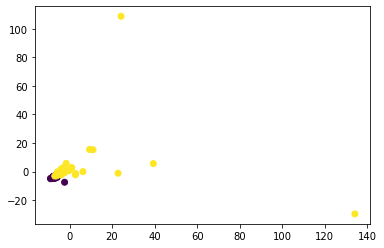

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

print(np.unique(doc_ids))
plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_ids)

O resultado do PCA mostra que existem outliers, porem, fazendo a visualização no cluster inferior esquerdo (veja figura abaixo), vemos uma separação dos documentos de acordo com os tópicos, mostrando que a representação via matriz Documentos $\times$ Palavras, está, até certo ponto, sendo capaz de representar os documentos de acordo com os tópicos.

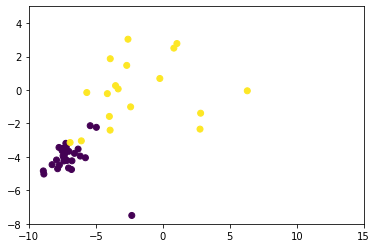

In [20]:
fig, ax = plt.subplots()
ax.set_xlim(-10, 15)
ax.set_ylim(-8, 5)

plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_ids)

## Term Frequency and Inverse Document Frequency (TF-IDF)
TF-IDF é uma técnica para quantificar a importância das palavra nos documentos.

**Nomenclatura**:
- t — palavra
- d — documento (conjunto de palavras)
- N — número de documentos

#### TF
TF mede a frequência de uma palavra em um documento. TF depende muito do tamanho do documento e da generalidade da palavra.

$$
TF(t,d)= \frac{\# t \mbox{ em } d}{\#\mbox{ palavras em } d} 
$$

onde $t$ é uma palavra e $d$ um documento.

#### IDF
IDF mede o quão informativa cada palavra é no conjunto de documentos. Uma palavra que aparece frequentemente em muitos documentos não é útil para discriminar os documentos, portanto seu IDF deve ser próximo de zero.

$$
IDF(t) = \frac{N}{\# t \mbox{ em todos os documentos}}
$$

onde $N$ é o número de documentos no corpus.

Combinando as duas métricas temos o chamado TF-IDF:

$$
TFIDF(t,d) = TF(t,d)*\log(IDF(t))
$$

In [21]:
X = BoW.values

# calculando o IDF das palavras
X_idf = X.shape[0]/np.sum(X,axis=0)
print(X_idf.shape)

# calculando TF de palavras em cada documento
X_tf = np.apply_along_axis(lambda x: x/np.sum(x>0),1,X)
print(X_tf.shape)

# calculando TF-IDF
X_tfidf = np.apply_along_axis(lambda x: x*np.log(X_idf),1,X_tf)
print(X_tfidf.shape)

M = (X_tfidf<0)   # valores negativos são zerados
X_tfidf[M] = 0.0

(3680,)
(54, 3680)
(54, 3680)


Os valores na matriz de Documentos $\times$ Palavras geralmente são substituidos pelos seus correspondentes TF-IDF, o que tende a gerar representações melhores para cada documento.   
=> a tendência é que a presença de outliers seja amenizada após a aplicação da normalização com o TFIDF.

(54, 2)


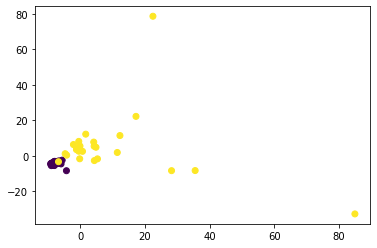

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X_tfidf)

pca_obj = PCA(n_components=2)
Xpca = pca_obj.fit_transform(X)

print(Xpca.shape)

fig, ax = plt.subplots()
plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_ids)

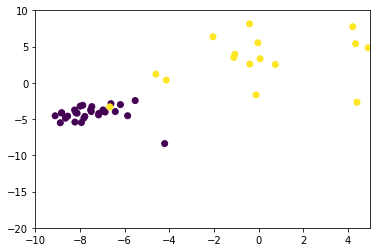

In [25]:
# visualizando sem os outliers
fig, ax = plt.subplots()
ax.set_xlim(-10,5)
ax.set_ylim(-20,10)
# ax.set_xlim(-10, 15)
# ax.set_ylim(-8, 5)

plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_ids)

In [26]:
# gerando um data frame com a BoW usando TFIDF
df_out = pd.DataFrame(data=X_tfidf,columns=BoW.columns.values,index=rows)

# df_out.to_csv('bag_of_words.csv',index=True)